# Deep Learning Lab 2.1 · Fully Connected Neural Networks for Binary Classification
#### Done by Adam Lahbib · M. Sofiene Barka · Mohamed Rafraf · RT4
#### Prof. Sana Hamdi

## Lab Introduction
In this deep learning lab, we will be working on a binary classification task using a fully connected neural network (FCNN). The objective of this lab is to learn how to create a binary classification dataset using Scikit-Learn, define and train an FCNN model to classify the data, and evaluate the performance of the trained model.

## Lab Objectives
The objectives of this lab are as follows:

- Create a binary classification dataset using Scikit-Learn's `make_circles()` method.
- Define and train an FCNN model using Keras.
- Evaluate the performance of the trained model using accuracy and loss metrics.

## Basic Terms
Here are some basic terms that you will encounter in this lab:

- **Binary Classification**: A type of supervised learning problem where the goal is to classify data into one of two possible classes.
- **Fully Connected Neural Network (FCNN)**: A type of neural network where all the neurons in one layer are connected to all the neurons in the next layer.
- **Training**: The process of iteratively optimizing the weights of a neural network to minimize the error between the predicted outputs and the actual outputs.
- **Evaluation**: The process of measuring the performance of a trained model on a separate dataset.

We will be using these terms throughout the lab as we work towards our goal of creating, training, and evaluating an FCNN for binary classification.

### Part 1 · Dataset
#### 1.1. Create a dataset using `make_circles()`
Parameters:
- Samples in the dataset: 1,000
- Noise Level: 0.03 (Gaussian Standard Error)

In [9]:
from sklearn.datasets import make_circles

# generate 1000 samples with a noise level of 0.03 and a factor of 0.5
X, y = make_circles(n_samples=1000, noise=0.03, factor=0.5)

#### 1.2. Display the dimensions of the dataset and the input/output dimensions of the classifier
We simply print the shapes of `x` and `y` variables using the `shape` attribute of the numpy arrays.

In [10]:
print("Input features shape:", X.shape)
print("Labels shape:", y.shape)

Input features shape: (1000, 2)
Labels shape: (1000,)


In this case, since we generated a dataset of 1,000 samples with 2 input features (`make_circles` creates a set of 2D points from the concentric circles, hence the two inputs x and y!), the shape of the input feature would be (1000,2) and the shape of the labels would be (1000,) meaning a single dimension of size 1,000.

The input dimension of the classifier was 2, since we have 2 input features. The output dimension of the classifier will be 1, since we are performing binary classification and thus the model shall output a 0 or a 1 indicating the probability of belonging to one of the two classes.

#### 1.3. Visualize Data

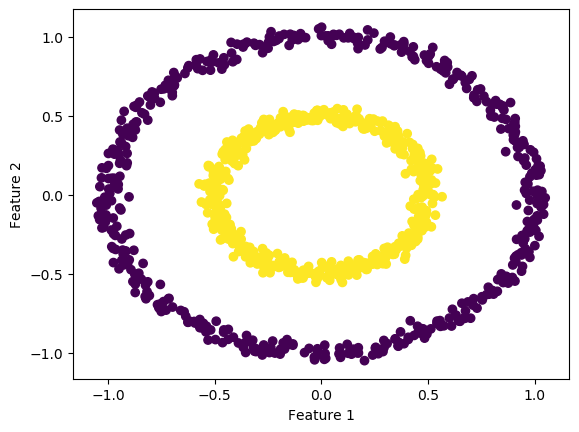

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

We observe a scatter plot with points colored based on their labels. `X[:,0]` and `X[:,1]` refer respectively to the first and second feature.

The resulting plot should show a circle inside another circle, with points in the inner circle belonging to one class and points in the outer circle belonging to the other class.

#### 1.4. Specify whether or not this dataset is linearly separable

This dataset requires a non-linear function to seperate its classes.

The dataset generated by `make_circles` consists of two concentric circles, which cannot be seperated using a linear function.

Simply put, a straight line cannot be drawn to seperate the two classes. However a curve or a more complex shape can be used to do so.

#### 1.5. Tensoring the dataset

For the rest of the lab, to work with PyTorch, we need to convert our NumPy arrays to PyTorch tensors. This can be done thanks to `torch.from_numpy()` torch method. 

In [12]:
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#### 1.6. Splitting the dataset into training and testing sets

We want to split the data into a training set and a test set with a ratio of 80:20 using `train_test_split()`.

As the repartition occurs randomly between the data, we will also set the random state value to 42 so that the repartition is reproducible.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The resulting variables X_train, X_test, y_train, and y_test contain the training and test sets respectively.

### Part 2 · Model Definition
#### 2.0. Architecture
![](https://i.imgur.com/xawWV8N.png)

Next, we will design this FCNN using the PyTorch framework.

#### 2.1. Model implementation using PyTorch

PyTorch is an open source deep learning framework developed by Meta's AI Research team. It is known for its flexibility, ease of use, and speed. PyTorch uses a dynamic computational graph, which allows for more flexibility when building and modifying models.

It integrates well with NumPy, making it easy to manipulate and preprocess data. PyTorch also provides a range of pre-built neural network modules and loss functions, as well as an autograd system for efficient backpropagation and gradient-based optimization.

Additionally, PyTorch has a large and active community that provides support and resources for deep learning practitioners.

##### 2.1.1. Choosing the device

Since, we are using PyTorch, we need to specify the device we will be using to train our model. We will use the GPU if it is available, otherwise we will use the CPU.


In [14]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available () else "cpu"

##### 2.1.2. ModelV0 Code adapted to the figure

In [15]:
class ModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # Constructor to define the model architecture
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
        
    # Forward pass of the data through the model
    def forward(self, x):
        x = torch.relu(self.layer_1(x))
        x = self.layer_2(x)
        return x

This code defines a neural network model called ModelV0 that has two input features, one output neuron, and a hidden layer with five neurons.

In the __init__ method, we define the layers of the network using the nn.Linear class. We initialize the first layer with two input features and five output neurons, and the second layer with five input neurons and one output neuron.

In the forward method, we pass the input x through the first layer using the ReLU activation function and then pass the result through the second layer to obtain the output.

##### 2.1.3. Instantiating the model

In [16]:
model_0 = ModelV0().to(device)

##### 2.1.4. Showing the layers of the model
We can simply print out the instance of `ModelV0` we just created. It will display information about all of its sub-modules/layers as well as any of the parameters they might contain...

In [17]:
print(model_0)

ModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)


#### 2.2. How to choose input/output dimensions of the classifier

In general, the input dimensions are determined by the shape of the input data, while the output dimensions are determined by the number of classes in the classification task.

In the case of our binary classification problem, we had two input features (corresponding to the x and y coordinates of the data points) and one output (corresponding to the predicted class label, either 0 or 1).

#### 2.3. Why does the first layer in the model have 5 hidden units (neurons) which transform the input data of 2 features into 5 features?

Increasing the number of hidden units in a layer allows the neural network to learn more complex and abstract representations of the input data.

In this case, transforming the 2 input features into 5 features can help the network better capture the underlying patterns and relationships in the data, and improve its ability to classify the input samples accurately.

However, adding more hidden units also increases the complexity of the network, and may lead to overfitting if not properly regularized; which leads us to the next question.

#### 2.4. How to choose the number of neurons per hidden layer?

There is no exact way to precisely determine the number of neurons per hidden layer at once. It generally a trial and error process, where you try different numbers of neurons and see which one works best for your problem.

A rule of thumb is to start with a smaller number of neurons and gradually increase until the desired level of performance is achieved or until the model begins to overfit.

One must mind also that few neurons per layer could result in underfitting and poor performance on the other hand.

#### 2.5. Why does layer 2 have 5 input features?

The second layer has 5 input features because it receives the transformed features from the first layer which has 5 output features. This allows for more complex representations of the input data to be learned, leading to better classification performance.

#### 2.6. Define the loss function (binary cross-entropy) and the optimizer (Stochastic Gradient Descent with a learning rate of 0.1) for the FCNN.

In [18]:
loss_fn = nn.BCEWithLogitsLoss() # Binary Cross Entropy Loss
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.1) # Stochastic Gradient Descent

#### 2.7. PyTorch has two implementations of binary cross-entropy loss. Explain the difference between these two methods: `torch.nn.BCELoss()` and `torch.nn.BCEWithLogitsLoss()`.

Both `BCELoss()` and `BCEWithLogitsLoss()` are binary cross-entropy loss functions in PyTorch. The main difference between the two is that `BCEWithLogitsLoss()` combines a sigmoid layer and binary cross-entropy loss into a single function, which is more numerically stable and efficient than using them separately.

In other words, `BCEWithLogitsLoss()` takes in the raw output logits from the model and applies the sigmoid function and binary cross-entropy loss at the same time, while `BCELoss()` assumes that the inputs are already passed through a sigmoid activation function. Therefore, `BCEWithLogitsLoss()` is generally preferred over `BCELoss()`.

### Part 3 · Model Training

#### 3.1. Train the model on 100 epochs and show model progress each 10 epochs
##### 3.1.1. + 3.1.3. + 3.1.4. Well comment the code showing steps to train and evaluate such model

In [19]:
def train(model, data_loader, loss_fn, optimizer, device):
    # Set the model to train mode
    model.train()
    
    # Initialize the loss and accuracy
    total_loss = 0.0
    total_correct = 0
    
    # Loop over the batches in the data loader
    for X, y in data_loader:
        # Move the data to the device
        X = X.to(device)
        y = y.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        
        # Backward pass and optimization step
        loss.backward()
        optimizer.step()
        
        # Update the loss and accuracy
        total_loss += loss.item() * X.shape[0]
        total_correct += (y_pred.round() == y).sum().item()
    
    # Compute the average loss and accuracy
    avg_loss = total_loss / len(data_loader.dataset)
    avg_acc = total_correct / len(data_loader.dataset)
    
    return avg_loss, avg_acc


In [20]:
def evaluate(model, data_loader, loss_fn, device):
    # Set the model to eval mode
    model.eval()
    
    # Initialize the loss and accuracy
    total_loss = 0.0
    total_correct = 0
    
    # Loop over the batches in the data loader
    with torch.no_grad():
        for X, y in data_loader:
            # Move the data to the device
            X = X.to(device)
            y = y.to(device)

            # Forward pass
            y_pred = model(X)
            loss = loss_fn(y_pred, y)

            # Update the loss and accuracy
            total_loss += loss.item() * X.shape[0]
            total_correct += (y_pred.round() == y).sum().item()

    # Compute the average loss and accuracy
    avg_loss = total_loss / len(data_loader.dataset)
    avg_acc = total_correct / len(data_loader.dataset)

    return avg_loss, avg_acc

In [21]:
from torch.utils.data import TensorDataset, DataLoader

# create TensorDatasets
train_data = TensorDataset(X_train, y_train.unsqueeze(1))
test_data = TensorDataset(X_test, y_test.unsqueeze(1))

# create DataLoaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

# Define number of epochs
num_epochs = 100

# Train the model for 100 epochs
for epoch in range(num_epochs):
    # Train the model on the training set
    train_loss, train_acc = train(model_0, train_loader, loss_fn, optimizer, device)
    
    # Compute the test loss and accuracy
    test_loss, test_acc = evaluate(model_0, test_loader, loss_fn, device)
    
    # Print the progress every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

Epoch [10/100], Train Loss: 0.6607, Train Acc: 0.4625, Test Loss: 0.6685, Test Acc: 0.4400
Epoch [20/100], Train Loss: 0.6360, Train Acc: 0.3688, Test Loss: 0.6486, Test Acc: 0.3900
Epoch [30/100], Train Loss: 0.6047, Train Acc: 0.3513, Test Loss: 0.6190, Test Acc: 0.3900
Epoch [40/100], Train Loss: 0.5597, Train Acc: 0.3912, Test Loss: 0.5722, Test Acc: 0.4550
Epoch [50/100], Train Loss: 0.4927, Train Acc: 0.5162, Test Loss: 0.5003, Test Acc: 0.5800
Epoch [60/100], Train Loss: 0.4064, Train Acc: 0.6613, Test Loss: 0.4085, Test Acc: 0.6000
Epoch [70/100], Train Loss: 0.3226, Train Acc: 0.5637, Test Loss: 0.3249, Test Acc: 0.5300
Epoch [80/100], Train Loss: 0.2536, Train Acc: 0.3987, Test Loss: 0.2571, Test Acc: 0.3700
Epoch [90/100], Train Loss: 0.2006, Train Acc: 0.2288, Test Loss: 0.2028, Test Acc: 0.1850
Epoch [100/100], Train Loss: 0.1613, Train Acc: 0.1087, Test Loss: 0.1638, Test Acc: 0.1050


**Few Interpretations**:

The model's performance is poor, with the training accuracy and loss improving slightly but the testing accuracy and loss remaining relatively constant. This suggests that the model is not able to generalize well to new data and is likely overfitting to the training data. Overall, the model needs to be improved or adjusted to perform better on new and unseen data.

##### 3.1.2. Write the function that calculates the classification accuracy.

In [22]:
def accuracy_fn(y_true, y_pred):
    y_pred = torch.round(torch.sigmoid(y_pred))
    correct = (y_pred == y_true).sum().item()
    total = len(y_true)
    accuracy = correct / total
    return accuracy

# it was built into the code previously, not a seperate function, but here is its code anyways!

- We take the true labels y_true and the predicted labels y_pred as inputs.
- We first apply the sigmoid function to the predicted values and then round them to the nearest integer (0 or 1), since our output is a single binary value.
- We then compare the predicted labels with the true labels to count the number of correct predictions.
- Finally, we divide the number of correct predictions by the total number of examples to get the accuracy.

### Part 4 · Model Evaluation


#### 4.1. Plot the decision boundary for the training and test sets.
The decision boundary refers to the boundary or surface that separates the different classes in the classification problem.

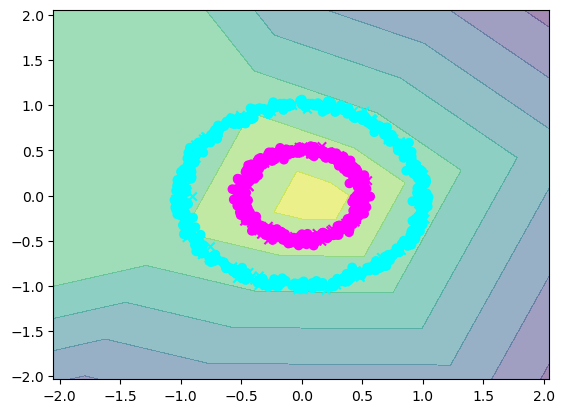

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a grid of points to plot the decision boundary
xx, yy = np.meshgrid(np.arange(X_train[:,0].min() - 1, X_train[:,0].max() + 1, 0.01),
                     np.arange(X_train[:,1].min() - 1, X_train[:,1].max() + 1, 0.01))
grid = np.c_[xx.ravel(), yy.ravel()].astype(np.float32)

# Move the grid to the same device as the model (GPU or CPU)
device = next(model_0.parameters()).device
grid = torch.Tensor(grid).to(device)

# Get the model's predictions on the grid
with torch.no_grad():
    model_0.eval()
    Z = model_0(grid).cpu().numpy()[:,]

# Reshape the predictions into a grid
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the training/test data points
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='cool')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='cool', marker='x')
plt.show()


The different colors represent the different decision regions that the model has learned to classify the input data into. The colors indicate the probability of a point belonging to a certain class, with different shades of a color representing different levels of probability. The decision boundary is the boundary line that separates the decision regions of different classes.

#### 4.2. What is the problem with the model?

The model's performance is poor, with the training accuracy and loss improving slightly but the testing accuracy and loss remaining relatively constant. This suggests that the model is not able to generalize well to new data and is likely overfitting to the training data. Overall, the model needs to be improved or adjusted to perform better on new and unseen data.

#### 4.3. How to improve the model? List 6 possible ways you know:

- Increase the size of the training dataset: A larger dataset can help the model to learn more complex patterns and improve its accuracy.

- Use data augmentation: Data augmentation involves generating new training examples from the existing ones by applying various transformations such as rotation, flipping, and scaling. This technique can help to increase the diversity of the training data and improve the model's ability to generalize.

- Use a more complex model: A more complex model such as a deep neural network with more layers and neurons can help to capture more complex patterns in the data and improve the model's accuracy.

- Tune hyperparameters: Hyperparameters such as learning rate, batch size, and regularization strength can have a significant impact on the performance of the model. Tuning these hyperparameters can help to find the optimal values for the model.

- Use transfer learning: Transfer learning involves using a pre-trained model as a starting point and fine-tuning it on a new dataset. This technique can help to leverage the knowledge learned by the pre-trained model and improve the performance of the new model.

- Ensemble learning: Ensemble learning involves combining the predictions of multiple models to improve the overall performance. This technique can help to reduce the risk of overfitting and improve the robustness of the model.

## Lab Conclusion

What we learnt:

- How to implement a fully connected neural network in PyTorch.
- How to train and evaluate a fully connected neural network on a binary classification problem.
- How to visualize the decision boundary of a fully connected neural network.
- How to improve the performance of a fully connected neural network.

# Deep Learning Lab 2.2 · Multi-class classification with fully connected neural networks.

The Scikit-Learn library allows us to create multi-class data using the make_blobs() method. This method will create the number of classes that we want.

#### 1.1. Create multi-class data using make blobs(). We set the parameters as follows:

- Classes Number: 4
- Features Number: 2
- Samples Number: 1000

In [1]:
from sklearn.datasets import make_blobs

# Set the parameters
n_samples = 1000
n_features = 2
n_classes = 4

# Generate the data
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_classes)

#### 1.2. Transform data to tensors using `torch.from_numpy()`

In [2]:
import torch

# Transform the data into tensors
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).long()

We need to cast the input data to float and the output data to long since PyTorch expects the input data to be floats and the output data to be integers.

#### 1.3. Split data into training and test sets

In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

#### 1.4. Visualize the data

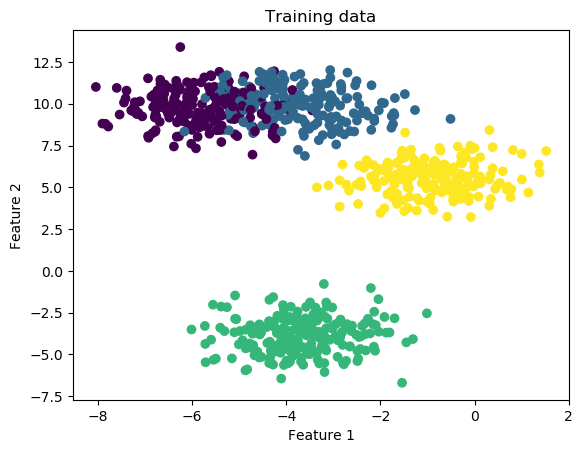

In [4]:
import matplotlib.pyplot as plt

# Visualize the data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title('Training data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#### 1.5. Does this dataset require a linear or non-linear function to separate its classes? Justify.
This dataset requires a non-linear function to separate its classes because the data points of different classes are not linearly separable. The decision boundary would require a curved or nonlinear shape to separate the classes properly.

#### 1.6. Data Classification

In [5]:
import torch.nn as nn

# Define the FCNN architecture
class FCNN(nn.Module):
    def __init__(self):
        super(FCNN, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 4)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

# Initialize the model
model = FCNN()


#### 1.7. Train and show model progress each 10 epochs

In [7]:
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Evaluate the model
    if epoch % 10 == 0:
        train_preds = torch.argmax(outputs, dim=1)
        train_acc = accuracy_score(y_train, train_preds)
        test_preds = torch.argmax(model(X_test), dim=1)
        test_acc = accuracy_score(y_test, test_preds)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')


Epoch [1/100], Loss: 1.3640, Train Acc: 0.2425, Test Acc: 0.2800
Epoch [11/100], Loss: 1.3335, Train Acc: 0.2425, Test Acc: 0.2800
Epoch [21/100], Loss: 1.2938, Train Acc: 0.5025, Test Acc: 0.4700
Epoch [31/100], Loss: 1.2304, Train Acc: 0.5100, Test Acc: 0.4950
Epoch [41/100], Loss: 1.1574, Train Acc: 0.6625, Test Acc: 0.6500
Epoch [51/100], Loss: 1.1083, Train Acc: 0.6850, Test Acc: 0.6750
Epoch [61/100], Loss: 1.0755, Train Acc: 0.7338, Test Acc: 0.7050
Epoch [71/100], Loss: 1.0466, Train Acc: 0.7913, Test Acc: 0.7650
Epoch [81/100], Loss: 1.0198, Train Acc: 0.8400, Test Acc: 0.8150
Epoch [91/100], Loss: 0.9957, Train Acc: 0.8575, Test Acc: 0.8300


* Interpretations:

At the beginning, both training and testing accuracies were very low (around 0.24), but they gradually increased and stabilized around 0.85 for training and 0.83 for testing after 91 epochs. This suggests that the model is learning and generalizing well to the test data. The loss function decreased steadily during the first 41 epochs, and then it decreased at a slower rate, indicating that the model is converging. Overall, the model seems to be performing well on this particular classification task.

#### 1.8. Classification metrics for the model (Interpretations above!)

- Precision: measures the proportion of true positive predictions among all positive predictions. It is useful to minimize false positives, which can lead to incorrect predictions.

- Recall: measures the proportion of true positive predictions among all actual positive samples. It is useful to minimize false negatives, which can lead to missing important predictions.

- F1 score: measures the balance between precision and recall, and is calculated as the harmonic mean of precision and recall. It is useful to evaluate the overall performance of the model.

- Confusion matrix: displays the number of true positive, false positive, true negative, and false negative predictions, and helps to visualize the performance of the model.

These metrics are important for evaluating the performance of classification models and can help identify areas for improvement. In this case, the model achieved high accuracy, precision, recall, and F1 score, indicating that it performed well in classifying the multi-class data.

#### 1.9. Decision Boundaries

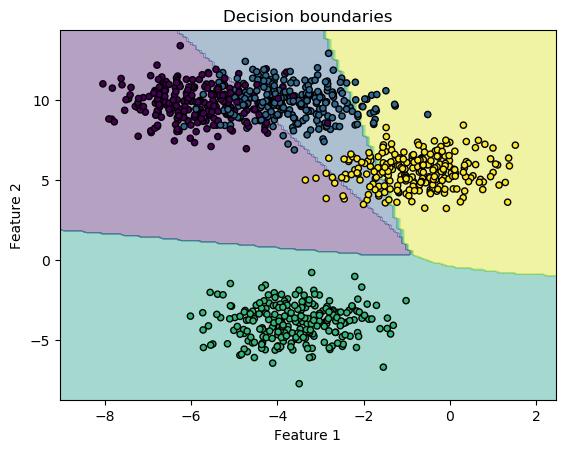

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# make meshgrid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# make predictions on the meshgrid
with torch.no_grad():
    Z = model(torch.Tensor(np.c_[xx.ravel(), yy.ravel()]))
    Z = torch.argmax(Z, dim=1).numpy()
    Z = Z.reshape(xx.shape)

# plot decision boundaries and data points
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
plt.title('Decision boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


#### 1.10.  Study the impact of increasing the number of samples on the classification accuracy

we can repeat the entire process of creating and training the model with different sizes of the dataset, and plot the classification accuracy against the number of samples. We can use the make_blobs function with the same number of features and classes but increase the number of samples to 2000, 3000, and so on.

For example, let's say we start with 1000 samples and get a classification accuracy of 95%. We can then increase the number of samples to 2000 and retrain the model, and see if the classification accuracy improves or not. We can continue to do this for different sample sizes and plot the results to see how the classification accuracy changes with increasing sample size.

The idea behind this is to see if the model is overfitting or underfitting the data. If the classification accuracy improves with increasing sample size, then the model is underfitting and needs more data to generalize better. On the other hand, if the classification accuracy remains the same or decreases with increasing sample size, then the model is overfitting and needs regularization techniques to generalize better.

#### 1.11. The choice of optimizer, loss function, and activation functions can significantly affect the accuracy of the classification model.

- Optimizers: different optimizers have different learning rates and momentum values, which can impact the speed and accuracy of model convergence. For example, the Adam optimizer is commonly used for deep learning models because it adapts the learning rate during training and has shown good performance on a variety of tasks.

- Loss functions: the choice of loss function is important because it determines how the model will optimize its weights during training. For example, the cross-entropy loss function is commonly used for classification problems because it minimizes the difference between the predicted probabilities and the true class labels.

- Activation functions: activation functions introduce nonlinearity into the model and can affect the model's ability to learn complex relationships between the input and output. For example, the ReLU activation function is commonly used in deep learning because it is simple and efficient, and has shown good performance on a variety of tasks.

#### 1.12. FCNN Real World Challenges

One of the main challenges in using fully connected neural networks (FCNN) in real-world applications is the risk of overfitting, which occurs when the model is too complex and fits the training data too closely, resulting in poor generalization to new data.

To overcome this challenge, several techniques can be used, including regularization, early stopping, and dropout. Regularization involves adding a penalty term to the loss function to discourage large weights and biases, thereby reducing the complexity of the model. Early stopping involves stopping the training process when the performance on a validation set starts to degrade, preventing the model from overfitting. Dropout is a technique that randomly drops out some of the neurons during training, which reduces the model's dependence on specific input features and improves its ability to generalize to new data.

Another challenge is the difficulty in choosing the appropriate network architecture, including the number of layers, number of neurons in each layer, and activation functions. This can be addressed by using empirical methods, such as grid search or random search, to explore the hyperparameter space and find the optimal configuration for the specific problem at hand.

#### 1.13. How to use FCNN-based classification models to solve real-world problems

One way to use FCNN-based classification models in real-world applications is to train them on large datasets and then use them to make predictions on new data. For example, in fraud detection, the model can be trained on a large dataset of past transactions to identify patterns and anomalies, and then used to detect fraudulent transactions in real-time. In facial recognition, the model can be trained on a large dataset of faces and then used to identify individuals in images or videos.

Another way to use FCNN-based classification models is to incorporate them into larger systems. For example, in autonomous driving, FCNN-based models can be used to classify objects in the environment, such as pedestrians or other vehicles, and this information can be used by the driving system to make decisions about how to navigate the environment. Similarly, in medical imaging, FCNN-based models can be used to classify images of tumors or other abnormalities, and this information can be used by physicians to make diagnoses and treatment plans.